# Library and settings

In [ ]:
import requests
import lxml.html as lx
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import json
import os
import folium
import geopandas as gpd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def save_result(dir,list1,save_name):
  '''
  save list result to json file
  '''
  if type(list1) != list:
    return "can only handle list"
  if not os.path.exists(dir):
    os.makedirs(dir)
  #ChatGPT
  # Specify the filename
  file_name = save_name+'.json'

  # Join the directory path and filename
  full_path = os.path.join(dir, file_name)

  # Save the list
  with open(full_path, 'w') as file:
      json.dump(list1, file)




# Save result
dir = "/content/drive/MyDrive/STA141B"
#enable scraping(~6hours)
run_scraping = False


# Data Acquisition

## Top50 National University Rankings(U.S. News)

output name: t50_df

In [ ]:
# Reference
#data scource: https://andyreiter.com/datasets/
excl_dir = "/content/drive/MyDrive/STA141B/US-News-Rankings-Universities.xlsx"
ranking = pd.read_excel(excl_dir,header = 1)

In [ ]:
#Select 2023 ranking
r23 = ranking[['University Name',2023,'State']]
#Select top 50
t50_df = r23[r23[2023] <=50]

## Top 50 School Location Infomation

output: t50_loc



In [ ]:
def search_one_school(name):
  '''
  search the school location info given school name
  Use Nominatim API
  '''
  end_point =  'https://nominatim.openstreetmap.org/search?'
  param = {
      'q':name,
      'format':'json',
      'limit':1
  }
  time.sleep(3)
  response = requests.get(end_point,param)
  result = response.json()
  if result == []:
    print(name)
  return result

In [19]:
'''
There are two typos in the university names:
University of Pittsburg
Elon Uuniversity
I correct the error by change the name in original excel:
University of Pittsburgh
Elon University
'''
#get the top 50 school names as list
t50_list = t50_df['University Name'].tolist()
#get their location info
t50_loc = []
for i in t50_list:
  t50_loc = t50_loc + search_one_school(i)

#save result avoid repeat scraping
  # Save result
  save_result(dir,t50_loc,"top_50_location")

Error: Received status code 403 for Princeton University


TypeError: can only concatenate list (not "NoneType") to list

## Graduate school admission result

output name: ad_list

### *Alternative list for school name correction*

from http://sourceforge.net/projects/triangleinequal/files/Grad%20Cafe%20Data/grad_cafe.py/download

In [ ]:
alternative_name_list=[['Bowling Green State University',
                        'Bowling Green State U'],
                       ['Tufts University',
                        'Tufts'],
                       ['University Of Minnesota',
                        'Minnesota U',
                        'Minnesota',
                        'UMN',
                        'The University Of Minnesota',
                        'U Of Minnesota',
                        'University Of Minnesota Twin Cities',
                        'Twin Cities',
                        'University Of Minnesota, Twin Cities',
                        'University Of Minessota',
                        'The University Of Minnesota, Twin Cities'],
                       ['University of California-Berkeley',
                        'UC Berkeley',
                        'University Of California, Berkeley',
                        'University Of Berkeley',
                        'UCBerkeley',
                        'UCB',
                        'California Berkeley',
                        'UC, Berkeley',
                        'Berkeley',
                        'University Of California Berkeley',
                        'Uc Berkeley',
                        'Ucberkeley',
                        'U C Berkeley',
                        'University Of California At Berkeley'],
                       ['University of Michigan-Ann Arbor',
                        'University Of Michigan, Ann Arbor',
                        'University Of Michigan',
                        'University Of Michigan Ann Arbor',
                        'Michigan, Ann Arbor',
                        'Michigan Ann Arbor',
                        'The University Of Michigan',
                        'Michigan',
                        'Michigan , Ann Arbor',
                        'The University Of Michigan, Ann Arbor',
                        'UM',
                        'U Of Michigan',
                        'U Michigan',
                        'University Of Michgan, Ann Arbor',
                        'University Of Michian Ann Arbor',
                        'Univ Of Mich, Ann Arbor',
                        'University Of Michigan , Ann Arbor'],
                       ['University of Texas-Austin',
                       'University Of Texas At Austin',
                       'University Of Texas, Austin',
                       'UT Austin',
                       'The University Of Texas At Austin',
                       'UT AUSTIN',
                       'UT At Austin'],
                       ['New York University',
                        'NYU'],
                       ['Penn State University',
                        'Penn State',
                        'Pen State',
                        'Pennsylvania State University',
                        'Penn State PSU'],
                       ['University Of Missouri',
                        'University Of Missouri',
                        'Missouri University',
                        'MIssouri University',
                        'University Of Missouri, Columbia'],
                       ['ETH Zurich',
                        'ETH'],
                       ['Univ Of Florida'],
                       ['NCSU',
                        'North Carolina State University',
                        'North Carolina State Univeristy',
                        'NC State',
                        'North Carolina State',
                        'University Of North Carolina',
                        'NC State University',
                        'North  Carolina State University',
                        'North Carilina State University',
                        'Ncsu',
                        'North Carolina Sate University'],
                       ['KU Leuven'],
                       ['University Of Virginia',
                        'UVA',
                        'The University Of Virginia',
                        'U Of Virginia',
                        'Virginia University'],
                       ['Virginia Tech',
                        'VT',
                        'VirginiaTech',
                        'Virginia Polytechnic Institute And State University'],
                       ['UBC',
                        'University Of British Columbia'],
                       ['University Of Georgia',
                        'UGA',
                        'The University Of Georgia',
                        'University Of Georgia Athens'],
                       ['University Of Notre Dame',
                       'Notre Dame',
                       'U Of Notre Dame'],
                       ['Harvard University',
                        'Harvard',
                        'Harvard Graduate Schol Of Arts And Sciences',
                        'Harvard Graduate School Of Arts And Sciences',
                        'Harvard University Graduate School Of Arts And Sciences',
                        'Havard',
                        'Harvard University Graduate'],
                       ['Columbia University',
                        'Columbia',
                        'Columbia',
                        'Columbia GSAS'],
                       ['University Of Florida',
                        'UF'],
                       ['Duke University',
                        'Duke',
                        'duke',
                        'Duke univesity'],
                       ['Stanford University',
                        'Stanford',
                        'Stanford Univeristy'],
                       ['University of Wisconsin-Madison',
                        'University Of Wisconsin, Madison',
                        'University Of Wisconsin Madison',
                        'University Of Wisconsin',
                        'University Of Wisconsin At Madison',
                        'UW Madison',
                        'Wisconsin',
                        'University If Wisconsin, Madison',
                        'U Of Wisconsin, Madison',
                        'Wisconsin Madison',
                        'UWisconsin Madison',
                        'Wisconsin At Madison'],
                       ['Oregon State University',
                        'Oregon State UNiversity'],
                       ['Purdue University',
                       'Purdue',
                       'Purdue  University',
                       'Purdue University, West Lafayette'],
                       ['Rice University',
                        'Rice',
                        'Rice Universiry'],
                       ['UTHSC'],
                       ['University Of Washington',
                        'U Washington, Seattle',
                        'U Of Washington',
                        'UW Seattle',
                        'University Of Washington Seattle',
                        'University Washington Seattle',
                        'University Of Washing',
                        'University Of Washington, Seattle',
                        'University Of Washington, Seatle',
                        'U Of Washington Seattle',
                        'Washington University'],
                        ['Washington University in St. Louis',
                         'Washington University in St. Louis',
                         'WUSTL',
                         'wustl'],
                       ['University Of Chicago',
                        'U Chicago',
                        'Chicago University',
                        'U Of Chicago',
                        'The University Of Chicago',
                        'University Of Chigago',
                        'Chicago',
                        'Uchicago',
                        'Universoty Of Chicago',
                        'Unversity Of Chicago'],
                       ['University Of Arizona',
                        'The University Of Arizona'],
                       ['Carnegie Mellon University',
                        'Carnegie Mellon',
                        'Carnegie Mellon University',
                        'CMU',
                        'Canegie Mellon',
                        'Cmu',
                        'Carbegie Mellon University'],
                       ['Cornell University',
                        'Cornell',
                        'Conrell'],
                       ['Yale University',
                        'Yale',
                        'Yale GASA',
                        'Yale School Of Arts And Sciences',
                        'Yale Graduate School Of Arts And Sciences',
                        'Yale Graduate School Of Arts And SciencesYale University',
                        'Yale School Of Engineering And Applied Science'],
                       ['Portland State University'],
                       ['Wake Forest University',
                        'WFU'],
                       ['University of North Carolina-Chapel Hill',
                        'University Of North Carolina At Chapel Hill',
                        'UNC',
                        'Chapel Hill',
                        'University Of North Carolina Chapel Hill',
                        'UNC Chapel Hill',
                        'University Of Carolina At Chapel Hill',
                        'University Of North Carolina, Chapel Hill'],
                       ['University Of Pennsylvania',
                        'University Of Pennsylvania Warton School',
                        'UPenn Wharton',
                        'Wharton University Of Pennsylvania',
                        'University Of Pennsylvania Wharton',
                        'Wharton',
                        'University Of Pennsylvania, The Wharton School',
                        'The Wharton School',
                        'University Of Pennsylvania GSE',
                        'Penn GSE'],
                       ['University of Illinois-Urbana-Champaign',
                       'UIUC',
                       'Uiuc',
                       'University Of Illinois At U',
                       'University Of Illinois At Urbana Champaign',
                       'University Of Illinois',
                       'Univerity Of Illinois, Urbana Champaign',
                       'University Of Illinois, Urbana Champaign'],
                       ['University Of Iowa',
                        'The University Of Iowa',
                        'U Of Iowa',
                        'Iowa University'],
                       ['Ohio State University-Columbus',
                        'Ohio State University',
                        'The Ohio State University',
                        'Ohio State',
                        'Ohio State U',
                        'OSU',
                        'Ohio State Univ'],
                       ['National Autonomous University Of Mexico'],
                       ['McMaster University',
                        'Mcmaster University',
                        'Mcmaster',
                        'McMaster'],
                       ['Iowa State',
                        'Iowa State University',
                        'Iowa State U',
                        'ISU'],
                       ['University Of California, Riverside',
                        'University California Riverside',
                        'University Of California Riverside UCR',
                        'UC, Riverside'],
                       ['McGill University'],
                       ['Oxford',
                        'Oxford University',
                        'University Of Oxford'],
                       ['Colorado State University',
                        'Colorado State U',
                        'Colorado State University'],
                       ['University of California-Irvine',
                        'University Of California Irvine',
                        'UC Irvine',
                        'UCI',
                        'University Of California, Irvine',
                        'University Of Califonia,Irvine'],
                       ['University Of Arkansas',
                        'University Of Arkansas Fayetteville'],
                       ['LSE',
                        'London School Of Economics'],
                       ['San Jose State'],
                       ['University of California-Los Angeles',
                        'UCLA',
                        'University Of California Los Angeles'],
                       ['University Of Manitoba'],
                       ['University Of Waterloo'],
                       ['rrgia State University',
                        'Waterloo U'],
                       ['George Washington University',
                        'The George Washington University',
                        'George Washington',
                        'George Washington Statsitics',
                        'George Washington U',
                        'GWU',
                        'George Wahington University',
                        'George Washington Universtiy'],
                       ['Rutgers',
                        'Rutgers University New Brunswick',
                        'Rutgers University',
                        'University Of Rutgers',
                        'Rutgers University, New Brunswick'],
                       ['California State University, Long Beach'],
                       ['University Of Toronto',
                        'The University Of Toronto'],
                       ['Michigan State University',
                        'Michigan State'],
                       ['Baylor University',
                        'Baylor U'],
                       ['University of California-Davis',
                        'University Of California, Davis',
                       'UC Davis'],
                       ['University of Southern California',
                        'USC',
                        'University Of Southern California',
                        'Usc',
                        'U Of South California',
                        'USC University Of Southern California'],
                       ['Georgia Institute of Technology',
                        'Georgia Tech',
                        'GIT'],
                       ['Boston University',
                        'Boston U',
                        'Boston University',
                        'BU'],
                       ['U Of Kentucky',
                        'University Of Kentucky'],
                       ['U Of Texas, Dallas',
                        'University Of Texas At Dallas',
                        'UT Dallas'],
                       ['Clemson University'],
                       ['Northwestern University',
                        'Northwestern',
                        'Northwestern U'],
                       ['Northeastern University',
                        'NEU'],
                       ['University Of Connecticut',
                        'UConn',
                        'U Of Connecticut',
                        'U Connecticut',
                        'University Of Connecticut, Storrs'],
                       ['Florida State University',
                        'Florida State',
                        'Florida State Univeristy'],
                       ['Kansas State University'],
                       ['IUPUI'],
                       ['University Of Cambridge'],
                       ['Colorado School Of Mines'],
                       ['Stony Brook University',
                        'Stony Brook U',
                        'Stony Brook',
                        'SUNY Stony Brook',
                        'Stony Brook SUNY',
                        'Suny Stoney Brook',
                        'SUNY SB'],
                       ['Johns Hopkins University',
                        'Johns Hopkins',
                        'John Hopkins University',
                        'John Hopkins',
                        'JHU'],
                       ['WPI'],
                       ['University Of New Mexico'],
                       ['University Of Massachusetts Amherst',
                        'UMASS Amherst',
                        'UMass Amherst'],
                       ['Uppsala University'],
                       ['Simon Fraser University SFU',
                        'Simon Fraser SFU',
                        'Simon Fraser University'],
                       ['University of California-Santa Barbara',
                        'University Of California Santa Barbara',
                        'UCSB',
                        'UC Santa Barabara',
                        'UC Santa Barbara',
                        'UC Santa Barbara',
                        'University Of California, Santa Barbara'],
                       ['San Diego State University'],
                       ['University Of Western Ontario',
                        'Western Ontario'],
                       ['Teachers College',
                        'Columbia University Teachers College',
                        'Columbia University, Teachers College'],
                       ['University Of South Carolina',
                        'U Of South Carolina',
                        'South Carolina',
                        'Unviersity Of South Carolina',
                        'The University Of South Carolina',
                        'University Of South Caroline'],
                       ['Queens University'],
                       ['Michigan Technological University'],
                       ['University Of Southampton'],
                       ['University Of Cincinnati'],
                       ['University Of Texas At San Antonio'],
                       ['Georgetown University',
                        'Georgetown'],
                       ['University Of California, Santa Cruz',
                        'University Of Santa Cruz',
                        'University Of Californa, Santa Cruz',
                        'UC Santa Cruz'],
                       ['U Of Pitt',
                        'U Of Pittsburgh',
                        'University Of Pittsburgh',
                        'University Of Pittsburg',
                        'The University Of Pittsburgh'],
                       ['University Of Victoria'],
                       ['Temple University'],
                       ['University Of Illinois, Chicago',
                        'University Of Illinois At Chicago'],
                       ['University Of Wyoming'],
                       ['Indiana University'],
                       ['York University'],
                       ['Villanova University',
                        'Villanova'],
                       ['University Of Rochester'],
                       ['North Dakota State University'],
                       ['University Of Maryland',
                        'University Of Maryland, College Park',
                        'U Maryland'],
                       ['Western Michigan University'],
                       ['University Of Alberta',
                        'Alberta'],
                       ['The University Of Akron',
                        'University Of Akron'],
                       ['Oklahoma State University'],
                       ['University Of Calgary'],
                       ['West Chester University'],
                       ['UFL',
                        'University Of Florida, Gainesville'],
                       ['Hkust'],
                       ['University of California-San Diego',
                        'UCSD',
                        'University Of California San Diego',
                        'University Of California, San Diego'],
                       ['Loyola University Chicago',
                        'Loyola Chicago'],
                       ['Texas Agricultural And Machinery University',
                        'Texus A'],
                       ['Auburn University'],
                       ['Utah State University'],
                       ['Arizona State  University',
                        'Arizona State University'],
                       ['Lehigh University'],
                       ['Syracuse University'],
                       ['Katholieke Universiteit Leuven'],
                       ['Washington State University'],
                       ['American University'],
                       ['Southern Methodist University',
                        'South Methodist U'],
                       ['University Of Delaware'],
                       ['George Mason  University',
                        'George Mason University'],
                       ['Colorado State University,Fort Collins'],
                       ['The University Of Warwick'],
                       ['NYU Stern'],
                       ['California State University, East Bay'],
                       ['Tulane University',
                        'Tulane'],
                       ['UC Berkeley School Of Public Health'],
                       ['University Of Nebraska Lincoln'],
                       ['Emory University',
                        'Emory',
                        'Emory University Rollins School Of Public Health'],
                       ['TAMU'],
                       ['UNLV'],
                       ['Universite De Montreal'],
                       ['Brown University',
                        'Brown',
                        'brown'],
                       ['Georgia State University'],
                       ['Rutgers University Graduate School Of Education'],
                       ['Case Western Reserve University',
                        'CWRU']
                       ]

### *Gradcafe*



In [ ]:
# Data collection
def to_upper(i):
  '''
  convert string or string in a list uppercase characters
  '''
  if type(i) == list:
    return [n.upper() for n in i]
  else:
    return i.upper()

def is_ascii(s):
  '''
  check if the string contains any non-ASCII characters
  #ChatGPT
  '''
  return all(ord(c) < 128 for c in s)

def get_one_school(row):
  '''
  get one school info and return as a dict
  '''
  # get school info and clean it
  temp = row.xpath('.//text()')
  temp = [re.sub(r'\s+', ' ', i.replace('\t', '').replace('\n', '')) for i in temp]
  temp = [i for i in temp if i.strip()] #remove all the empty str
  if len(temp) != 0:
    school_temp = re.split("\,",temp[0])[1]
    school_temp = school_temp.strip(' "').strip()
    if is_ascii(school_temp):
      school = school_temp
    else:
      school = ''
    if temp[1].startswith("Added on "):
      comment = ""
      Added_date = temp[1]
      Decision = temp[2]
      Tags = to_upper(temp[3:])
    else:
      comment = temp[1]
      Added_date = temp[2]
      Decision = temp[3]
      Tags = to_upper(temp[4:])
    # dict
    one_school_dict = {
          "School": school,
          "Comment": comment,
          "Added Date": Added_date,
          "Decision":Decision,
          "Tags":Tags
  }
    return one_school_dict


def get_page(page):
  '''
  get the comments and tags in one page
  return list
  '''
  time.sleep(10)
  endpoint = 'https://www.thegradcafe.com/survey/?'
  params = {"program":"Computer Science","page":page,"per_page":40}
  result=requests.get(endpoint,params)
  html = lx.fromstring(result.text)
  rows = html.xpath("//div[contains(@class, 'row mb-2')]")
  school_list = [get_one_school(row) for row in rows]
  return school_list


# Data clearning

def correct_school_name(ad_list,alternative_name_list):
  '''
  replace the school name variant with correct name
  UC Davis --> University Of California, Davis
  #Reference ChatGPT
  '''
  # Create a dictionary that maps variant names to the correct names
  name_mapping = {variant: names[0] for names in alternative_name_list for variant in names}
  # Now iterate over your list of dictionaries and update the 'School' field if necessary
  for entry in ad_list:
      entry['School'] = entry['School'].strip()
      cleaned_school_name = entry['School'].strip()  # Remove any leading/trailing whitespace
      if cleaned_school_name in name_mapping:
          entry['School'] = name_mapping[cleaned_school_name]
  return ad_list

In [ ]:
if run_scraping:
  ad_list = []
  for i in range(1,1303): #total pages 282:40;562:20
    ad_list = ad_list+get_page(i)
  # Remove all None values
  ad_list = [i for i in ad_list if i is not None]
  ad_list = correct_school_name(ad_list,alternative_name_list)
  # Save result
  save_result(dir,ad_list,"admission_result_stats")


## City Comment Scraping

output:all_city_comments

In [ ]:
import time
import requests
from bs4 import BeautifulSoup
from lxml import html

url = 'https://forum.thegradcafe.com/forum/18-city-guide/'  #Going into the "city guide page of the website"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

list1 = ["https://forum.thegradcafe.com/forum/18-city-guide/page/" + str(i) + "/" for i in range(1, 14)]#list that contains urls of 13 pages of the City Guide section

def scrape_city_urls(page_urls):
    city_urls = {}
    found_rochester = False

    for page_url in page_urls:
        response = requests.get(page_url)
        if response.status_code == 200:
            tree = html.fromstring(response.content)

            city_links = tree.xpath("//div[@class='ipsDataItem_main']//a[not(contains(@href, '/profile/')) and @title]")

            for city_link in city_links:
                city_name = city_link.get('title').strip()
                city_url = city_link.get('href')
                if not city_url.startswith('http'):#data cleaning that removes some pinned ads and extra urls
                    city_url = 'https://forum.thegradcafe.com' + city_url
                if city_name == 'Rochester, NY':
                    found_rochester = True
                if found_rochester and not city_name.startswith('Go to page') and not city_name.startswith('Finding') and not city_name.startswith('Find'):
                    city_urls[city_name] = city_url

    return city_urls
city_urls = scrape_city_urls(list1)

def scrape_comments(city_url):#Function used to scrape comments within each city
    comments = []
    visited_urls = set()
    while city_url:
        if city_url in visited_urls:
            break
        visited_urls.add(city_url)

        response = requests.get(city_url)
        if response.status_code == 200:
            tree = html.fromstring(response.content)
            comment_elements = tree.xpath("//div[@data-role='commentContent']/p")

            for element in comment_elements:
                comment = element.text_content().strip()
                if comment:
                    comments.append(comment)

            next_page_element = tree.xpath("//a[@rel='next']")
            city_url = next_page_element[0].get('href') if next_page_element else None
        else:
            break
    time.sleep(10)
    return comments
if run_scraping:
  #previous list of page URLs
  list1 = ["https://forum.thegradcafe.com/forum/18-city-guide/page/" + str(i) + "/" for i in range(1, 14)]

  #Scrape city URLs
  city_urls = scrape_city_urls(list1)

  #Scrape comments for all cities and store them
  all_city_comments = {}
  for city_name, city_url in city_urls.items():
      print(f"Scraping comments for {city_name}")
      all_city_comments[city_name] = scrape_comments(city_url)

  #Save result
  list_city = [all_city_comments]
  save_result(dir,list_city,"all_city_comments")

# Data processing


1.  Integrate ad data into DataFrame
2.  Admission data by school
3.  Freqency terms analysis on city comments

output:

per_year,_ = get_school_profile(school_name)

inte_profile
   

(1) Admission Data

In [ ]:
def get_school_profile(school_name):
  '''
  input school name,
  return the admission profile per year or integrated
  as a data frame
  icluding:
  average GPA;
  admission rate;
  international admissions;
  high freq word of the city it located
  '''
  #extract all the data from this school
  temp = [i for i in ad_list if i['School'] == school_name]
  #collect and calculate the target data
  year = [re.split("\,",i['Added Date'])[1].strip() for i in temp]
  decision = [re.split(" ",i['Decision'])[0].strip() for i in temp]
  international = [1 if 'INTERNATIONAL' in i['Tags'] else 0 for i in temp ]
  GPA = [next((x.split(" ")[-1] for x in i['Tags'] if "GPA" in x), np.nan) for i in temp] #ChatGPT
  #make a dataframe
  profile = {
      'School':school_name,
      'year':year,
      'decision':decision,
      'international':international,
      'AD_GPA':GPA
  }

  df = pd.DataFrame(profile)
  # change decision to binary
  df.loc[df['decision'] != 'Accepted', 'decision'] = 0
  df.loc[df['decision'] == 'Accepted', 'decision'] = 1
  df['decision'] = pd.to_numeric(df['decision'], errors='coerce')
  #calculate AD GPA
  #convert to numeric
  df['AD_GPA'] = pd.to_numeric(df['AD_GPA'], errors='coerce')
  #Set reject group to nan
  df.loc[df['decision'] == 0, 'AD_GPA'] = np.nan
  #calculate GPA per year
  df_per_year = df.groupby("year", as_index = False)['AD_GPA'].mean(numeric_only=True)
  #calcualte admission rate per year
  df_per_year['Admission rate'] = df.groupby("year", as_index = False)['decision'].mean(numeric_only=True)['decision']
  #convert to numeric
  df['international'] = pd.to_numeric(df['international'], errors='coerce')
  df_per_year['International ad'] = df.groupby("year", as_index = False)['international'].sum(numeric_only=True)['international']
  #df_inte by mean for all years
  df_inte = df_per_year.mean(numeric_only=True).to_frame().T #ChatGPT
  df_inte['School'] = school_name
  df_per_year['School'] = school_name
  return df_per_year,df_inte

In [ ]:
#Load scrapping result
with open('/content/drive/MyDrive/STA141B/admission_result_stats.json', 'r') as file:
    ad_list = json.load(file)
# get Top50 school name
t50_name = t50_df['University Name'].tolist()
#get the first school
_,result = get_school_profile(t50_name[0])
#get all remaining school
for i in t50_name[1:]:
  _,temp = get_school_profile(i)
  result =pd.concat([result,temp], ignore_index=True)
#drop year
inte_profile = result.drop('year', axis=1)

(2) Term Frequency Analaysis on City Comments

In [ ]:
#stop words includes meaningless words from previous result
customized_stopwords = [
    "im", "also", "would", "like", "one", "get", "know", "really",
    "dont", "people", "much", "ive", "think", "go", "going"
]#summaried by ChatGPT and re-check by us
cus_stopwords = stopwords.words('english')+customized_stopwords

In [ ]:
def process_city_comments(comments):
    combined_text = " ".join(comments)# convert to str
    tokens = word_tokenize(re.sub(r'[^\w\s]', '', combined_text.lower())) ## Tokenize by word, removing punctuation
    filtered_tokens = [word for word in tokens if word not in cus_stopwords]#stopwords removal
    term_freq = FreqDist(filtered_tokens)
    return term_freq

In [ ]:
#load saved data
with open('/content/drive/MyDrive/STA141B/all_city_comments.json', 'r') as file:
    loaded_list = json.load(file)
#convert back to dict
city_dict = loaded_list[0]
#get term frequencies per city
city_term_frequencies = {}
for city, comments in city_dict.items():
    city_term_frequencies[city] = process_city_comments(comments)

for city, freq in city_term_frequencies.items():
    print(f"{city} most common words:")
    print(freq.most_common(10))

# Visualization


Outline:

1.  大学在美国每个州的分布
2.  大学CS专业录取profile地图可视化
3.  CS专业录取疫情前后的数据对比
4.  T50录取数据趋势（标化随排名变化？）(optional)



## Interactive T50 School profile map

In [ ]:
# GeoDataFrame

#get lat, lon, and address
lat = [float(i['lat']) for i in t50_loc]
lon = [float(i['lon']) for i in t50_loc]
address = [i['display_name'] for i in t50_loc]

In [ ]:
#reform inte_profile into GeoDataFrame
Geo_DataFrame = inte_profile
Geo_DataFrame['lat'] = lat
Geo_DataFrame['lon'] = lon
Geo_DataFrame['lat'] = lat
Geo_DataFrame['Address'] = address
gdf = gpd.GeoDataFrame(
    Geo_DataFrame, geometry=gpd.points_from_xy(Geo_DataFrame.lon, Geo_DataFrame.lat)
)
gdf.set_crs(epsg=4326, inplace=True)

,AD_GPA,Admission rate,International ad,School,lat,lon,Address,geometry
0,3.807378,0.290679,27.105263,Princeton University,40.338675,-74.658365,"Princeton University, Alexander Road, Princeto...",POINT (-74.65837 40.33868)
1,NaN,NaN,NaN,Massachusetts Institute of Technology,42.358253,-71.096627,"Massachusetts Institute of Technology, Bishop ...",POINT (-71.09663 42.35825)
2,3.677500,0.266879,13.263158,Harvard University,42.365743,-71.122214,"Harvard University, Western Avenue, Barry's Co...",POINT (-71.12221 42.36574)
3,3.876442,0.289084,14.105263,Yale University,41.257131,-72.989670,"Yale University, West Haven, South Central Con...",POINT (-72.98967 41.25713)
4,3.875231,0.238860,54.842105,Stanford University,37.431314,-122.169365,"Stanford University, 408, Panama Mall, Stanfor...",POINT (-122.16937 37.43131)
5,NaN,0.500000,2.000000,University of Chicago,41.791397,-87.600844,"The University of Chicago, 5801, South Ellis A...",POINT (-87.60084 41.79140)
6,NaN,NaN,NaN,University of Pennsylvania,39.949338,-75.189644,"University of Pennsylvania, Market Street, Pow...",POINT (-75.18964 39.94934)
7,3.638444,0.354321,10.235294,Johns Hopkins University,39.330202,-76.621854,"Johns Hopkins University, 3400, North Charles ...",POINT (-76.62185 39.33020)
8,NaN,NaN,NaN,California Institute of Technology,34.137014,-118.125288,"California Institute of Technology, San Pasqua...",POINT (-118.12529 34.13701)
9,3.718031,0.362759,13.052632,Duke University,36.000156,-78.944230,"Duke University, Cameron Boulevard, Durham, Du...",POINT (-78.94423 36.00016)


In [ ]:
#Map start from UC Davis
m = folium.Map(location=[38.5382, -121.7617], zoom_start=14)
folium.GeoJson(
    gdf,
    name="Interactive T50 School profile",
    marker=folium.Marker(icon=folium.Icon(icon='star')),
    tooltip=folium.GeoJsonTooltip(fields=['School']),
    popup=folium.GeoJsonPopup(fields=["School", "AD_GPA", "Admission rate", "International ad",'Address']),
    #style_function=style_function,
    zoom_on_click=True,
).add_to(m)
m

## Pandemic

pandemic start from January 20, 2020


Reference:
CDC,https://www.cdc.gov/museum/timeline/covid19.html#:~:text=January%2020%2C%202020,respond%20to%20the%20emerging%20outbreak.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#Function to plot data for a given university
def plot_data(df, university_name):
    #Create a new figure and set of axes
    fig, ax = plt.subplots(figsize=(10, 6))

    #Convert the 'year' column to datetime format for consistent plotting
    df['year'] = pd.to_datetime(df['year'], format='%Y')

    #Plot the Admission Rate, Average GPA, and International Admissions over the years
    ax.plot(df['year'], df['Admission rate'], label='Admission Rate', marker='o')
    ax.plot(df['year'], df['AD_GPA'], label='Average GPA', marker='s')
    ax.plot(df['year'], df['International ad'], label='International Admissions', marker='^')

    #Add a vertical line to indicate the start of the pandemic
    pandemic_start = pd.Timestamp('2020-01-20')
    ax.axvline(x=pandemic_start, color='red', linestyle='--', label='Start of Pandemic')

    #Set the title, labels, and legend for the plot
    ax.set_title(f'{university_name} Admission Profiles Before and After Pandemic')
    ax.set_xlabel('Year')
    ax.set_ylabel('Value (accordingly)')
    ax.legend()

    #Add grid lines for better readability
    ax.grid(True)

    #Set the x-axis range from 2008 to 2023
    ax.set_xlim([pd.Timestamp('2008-01-01'), pd.Timestamp('2023-12-31')])

    #Display the plot
    plt.show()

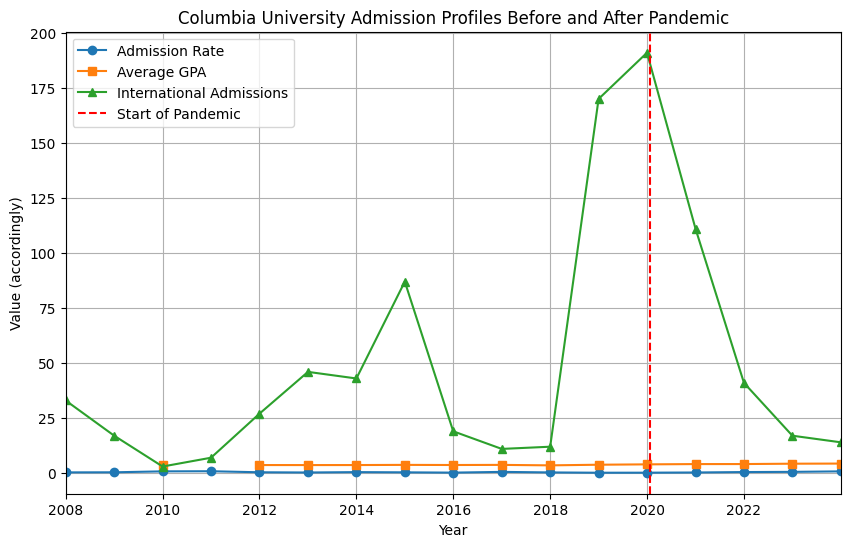

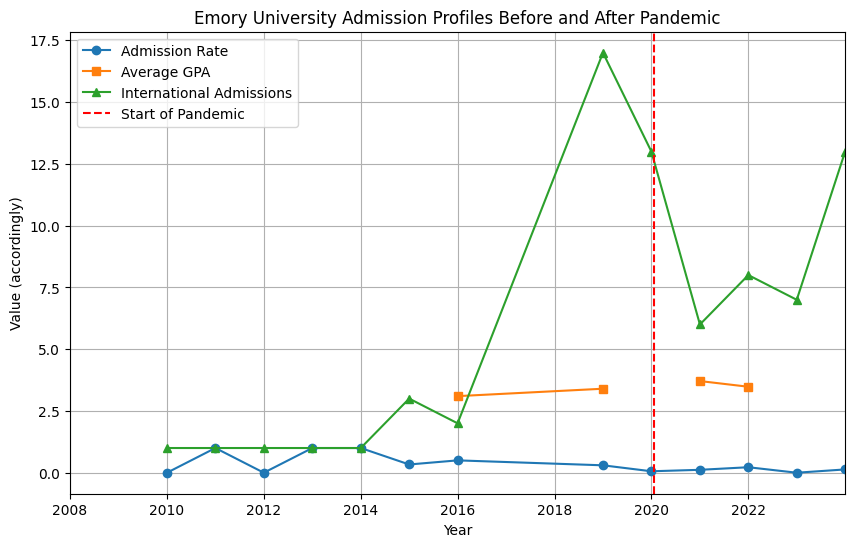

In [ ]:
# Example of the function
a17, _ = get_school_profile(t50_name[17]) #Get the admission profile
plot_data(a17, t50_name[17])#Plot the data

a21, _ = get_school_profile(t50_name[21])
plot_data(a21, t50_name[21])